# Отчет по продуктовому анализу

## План анализа:
1. Расчет основных метрик
2. Воронка продаж и анализ платежей
3. Анализ вовлеченности пользователей (DAU, MAU, WAU, STicky Factor, Average Session Duration, Retention Rate, Churn Rate, ARPU и Lifetime Value)
4. Выводы и рекомендации

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Загрузка данных
messages_df = pd.read_csv('C:/Users/User/Downloads/Firefox Download/corrected_messages.csv')
users_df = pd.read_csv('C:/Users/User/Downloads/Firefox Download/corrected_users.csv')
renewals_df = pd.read_csv('C:/Users/User/Downloads/Firefox Download/corrected_renewals.csv')
payments_df = pd.read_csv('C:/Users/User/Downloads/Firefox Download/corrected_payments.csv')


In [45]:
# Проверка на пропуски и корректность типов данных
print(messages_df.info())
print(users_df.info())
print(renewals_df.info())
print(payments_df.info())

# Примерные выводы первых строк каждого датафрейма
print(messages_df.head())
print(users_df.head())
print(renewals_df.head())
print(payments_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18694 entries, 0 to 18693
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18694 non-null  int64  
 1   id          18694 non-null  int64  
 2   role        18694 non-null  object 
 3   content     18694 non-null  object 
 4   user_id     18694 non-null  int64  
 5   mode        18694 non-null  object 
 6   message_id  18694 non-null  int64  
 7   created_at  18694 non-null  object 
 8   remark      759 non-null    object 
 9   dialog_id   8142 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     868 non-null    int64 
 1   id             868 non-null    int64 
 2   language_code  610 non-null    object
 3   joined_a

## Общие метрики

In [46]:
# Количество пользователей
total_users = users_df['id'].nunique()

# Количество сообщений
total_messages = messages_df['message_id'].count()

# Количество продлений подписки
total_renewals = renewals_df['id'].count()

# Общая сумма платежей
total_payments = payments_df['total_amount'].sum()

print(f'Общее количество пользователей: {total_users}')
print(f'Общее количество сообщений: {total_messages}')
print(f'Общее количество продлений подписки: {total_renewals}')
print(f'Общая сумма платежей: {total_payments}')

Общее количество пользователей: 868
Общее количество сообщений: 18694
Общее количество продлений подписки: 1065
Общая сумма платежей: 5374


## Воронка продаж

In [47]:
# Этап 1: Привлечение пользователя
users_acquired = users_df.shape[0]

# Этап 2: Пользователи, отправившие хотя бы одно сообщение
users_sent_messages = messages_df['user_id'].nunique()

# Этап 3: Пользователи, сделавшие хотя бы один платеж
users_made_payments = payments_df['id'].nunique()

print(f'Привлеченные пользователи: {users_acquired}')
print(f'Пользователи, отправившие хотя бы одно сообщение: {users_sent_messages}')
print(f'Пользователи, сделавшие хотя бы один платеж: {users_made_payments}')

Привлеченные пользователи: 868
Пользователи, отправившие хотя бы одно сообщение: 791
Пользователи, сделавшие хотя бы один платеж: 26


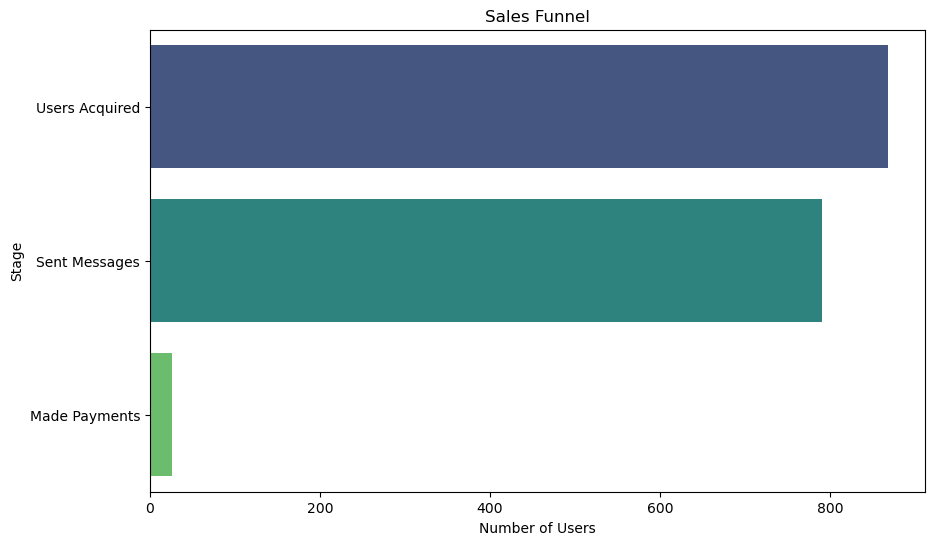

In [14]:
# Данные для воронки продаж 
funnel_stages = ['Users Acquired', 'Sent Messages', 'Made Payments']
funnel_values = [users_acquired, users_sent_messages, users_made_payments]

# Создание DataFrame для воронки
funnel_df = pd.DataFrame({
    'Stage': funnel_stages,
    'Users': funnel_values
})

# Визуализация воронки продаж
plt.figure(figsize=(10, 6))
sns.barplot(x='Users', y='Stage', data=funnel_df, palette='viridis')
plt.xlabel('Number of Users')
plt.ylabel('Stage')
plt.title('Sales Funnel')
plt.show()



In [19]:
# Расчет конверсии
conversion_to_sent_messages = (users_sent_messages / users_acquired) * 100
conversion_to_made_payments = (users_made_payments / users_acquired) * 100

print(f'Конверсия от Users Acquired к Sent Messages : {round(conversion_to_sent_messages,2)}%') 
print(f'Конверсия от Users Acquired к Made Payments:  {round(conversion_to_made_payments,2)}%')

Конверсия от Users Acquired к Sent Messages : 91.13%
Конверсия от Users Acquired к Made Payments:  3.0%


## Интерпретация результатов

    1. Высокая конверсия от привлечения к отправке сообщений: Более 91% пользователей, зарегистрированных в системе, отправили хотя бы одно сообщение. Это указывает на высокую начальную вовлеченность пользователей.
    2. Низкая конверсия от привлечения к совершению платежей: Только около 3% пользователей сделали хотя бы один платеж. Это указывает на необходимость улучшения стратегии монетизации и создания дополнительных стимулов для пользователей совершать платежи.

## Анализ платежей пользователей

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


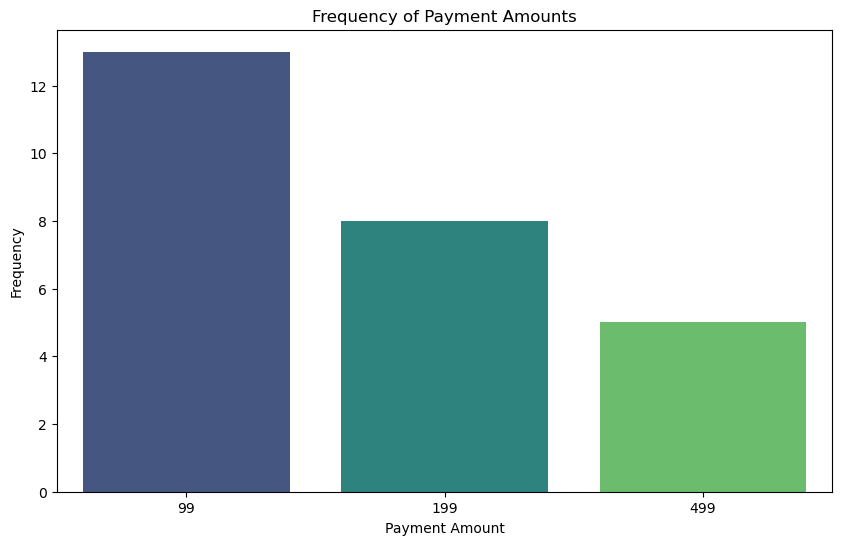

total_amount
99     13
199     8
499     5
Name: count, dtype: int64

In [20]:

# Преобразование столбца total_amount в категориальный (фактор)
payments_df['total_amount'] = payments_df['total_amount'].astype('category')

# Анализ распределения категорий платежей
payment_category_counts = payments_df['total_amount'].value_counts()

# Визуализация распределения категорий платежей
plt.figure(figsize=(10, 6))
sns.countplot(x=payments_df['total_amount'], palette='viridis')
plt.xlabel('Payment Amount')
plt.ylabel('Frequency')
plt.title('Frequency of Payment Amounts')
plt.show()

payment_category_counts

## Выводы

    Преобладание малых платежей. Большинство платежей равны 99 рублям. Это может указывать на предпочтение пользователей к меньшим суммам, либо на наличие акционных предложений по этой цене.
    Средние и большие платежи. Суммы в 199 и 499 рублей также присутствуют, но в меньшем количестве. Это может указывать на то, что пользователи менее заинтересованы в долгосрочной подписке, нежели в краткосрочной

## Метрики удержания и вовлеченности

#### Расчет метрик DAU, WAU, MAU
    DAU (Daily Active Users): Среднее количество уникальных активных пользователей в день.
    WAU (Weekly Active Users): Среднее количество уникальных активных пользователей в неделю.
    MAU (Monthly Active Users): Среднее количество уникальных активных пользователей в месяц.

In [58]:
# Преобразование столбца 'created_at' в формат datetime
messages_df['created_at'] = pd.to_datetime(messages_df['created_at'])

# Группировка по дате и подсчет уникальных пользователей на каждый день
daily_active_users = messages_df.groupby(messages_df['created_at'].dt.date)['user_id'].nunique()

In [77]:
# Расчет DAU (Daily Active Users)
dau_df = messages_df.groupby(messages_df['created_at'].dt.date)['user_id'].nunique()
dau = dau_df.mean()

# Расчет WAU (Weekly Active Users)
wau_df = messages_df.groupby(messages_df['created_at'].dt.to_period('W'))['user_id'].nunique()
wau = wau_df.mean()

# Расчет MAU (Monthly Active Users)
mau_df = messages_df.groupby(messages_df['created_at'].dt.to_period('M'))['user_id'].nunique()
mau = mau_df.mean()

dau, wau, mau


(18.027027027027028, 80.0, 278.3333333333333)

In [81]:
# количество уникальных активных пользователей в день
dau_df

created_at
2024-03-01    14
2024-03-02    14
2024-03-03    10
2024-03-04    12
2024-03-05    13
              ..
2024-05-09     8
2024-05-10     7
2024-05-11     7
2024-05-12     8
2024-05-13     9
Name: user_id, Length: 74, dtype: int64

In [82]:
# количество уникальных активных пользователей в неделю
wau_df

created_at
2024-02-26/2024-03-03     32
2024-03-04/2024-03-10    299
2024-03-11/2024-03-17    234
2024-03-18/2024-03-24     58
2024-03-25/2024-03-31     55
2024-04-01/2024-04-07     34
2024-04-08/2024-04-14     54
2024-04-15/2024-04-21     47
2024-04-22/2024-04-28     51
2024-04-29/2024-05-05     49
2024-05-06/2024-05-12     38
2024-05-13/2024-05-19      9
Freq: W-SUN, Name: user_id, dtype: int64

In [83]:
# количество уникальных активных пользователей в месяц
mau_df

created_at
2024-03    601
2024-04    159
2024-05     75
Freq: M, Name: user_id, dtype: int64

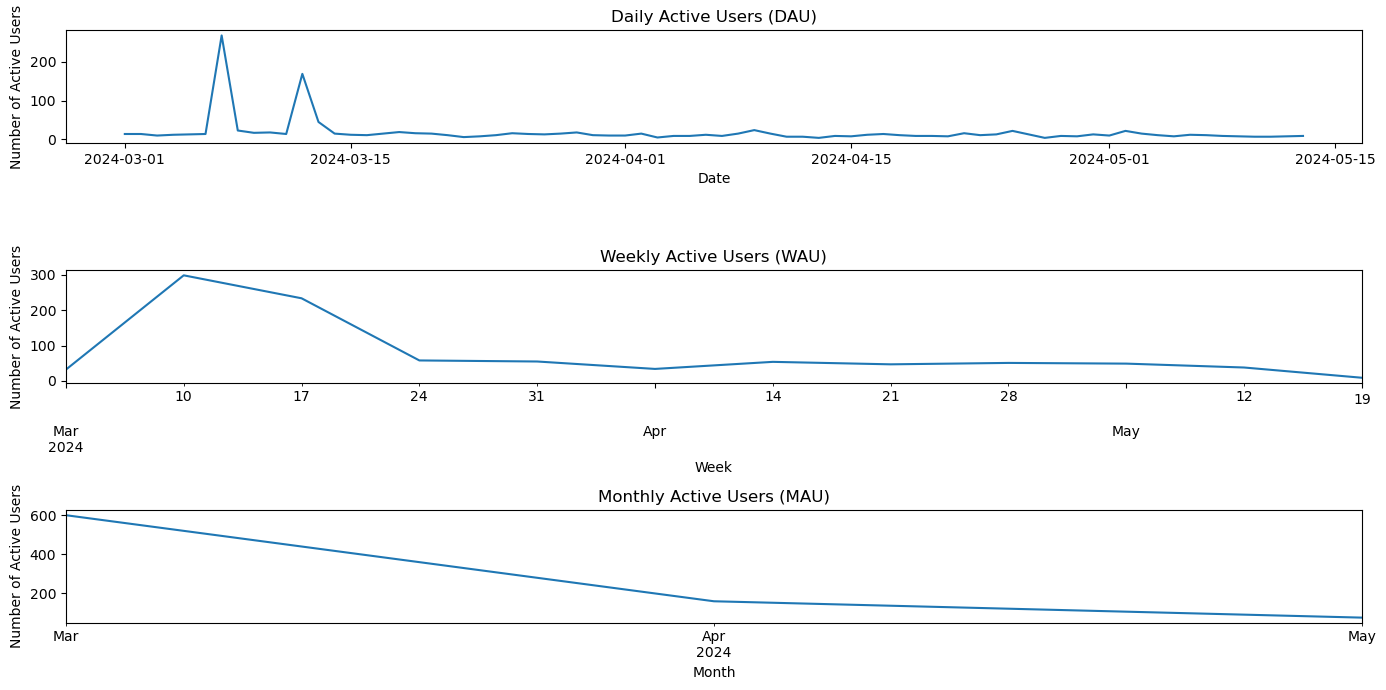

In [60]:
# Визуализация DAU, WAU, MAU
plt.figure(figsize=(14, 7))

# DAU Plot
plt.subplot(3, 1, 1)
dau_df.plot(kind='line')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')

# WAU Plot
plt.subplot(3, 1, 2)
wau_df.plot(kind='line')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Number of Active Users')

# MAU Plot
plt.subplot(3, 1, 3)
mau_df.plot(kind='line')
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Number of Active Users')

plt.tight_layout()
plt.show()


### Выводы:
График показывает высокий наплыв пользователей в начале марта, затем стабильное количество пользователей на протяжении последующих месяцев

## Расчет Sticky Factor

Sticky Factor (или Stickiness) — это метрика, которая показывает, насколько активно пользователи взаимодействуют с продуктом. Она рассчитывается как соотношение ежедневных активных пользователей (DAU) к ежемесячным активным пользователям (MAU). Чем выше значение, тем более "липким" является продукт, что означает, что пользователи часто возвращаются к продукту.

Формула Sticky Factor

Sticky Factor = (DAU / MAU) * 100%

In [52]:
# Расчет Sticky Factor
sticky_factor = (dau / mau) * 100 if mau > 0 else 0

sticky_factor

6.476776177374981

 Вывод: Низкий Sticky Factor (<20%) может указывать на то, что пользователи не взаимодействуют с продуктом регулярно, что требует внимания и улучшений.

## Анализ средней продолжительности сессии
Анализ средней продолжительности сессии (Average Session Duration) позволяет понять, 
сколько времени пользователи проводят в боте за одно посещение. 
Для этого анализа нужно определить начало и конец каждой сессии для каждого пользователя, а затем рассчитать продолжительность каждой сессии.

In [40]:
# Сортировка данных по пользователю и времени создания сообщения
messages_df = messages_df.sort_values(by=['user_id', 'created_at'])

# Определение разницы во времени между текущим и предыдущим сообщением для каждого пользователя
messages_df['time_diff'] = messages_df.groupby('user_id')['created_at'].diff()

# Считаем начало новой сессии, если разница превышает 30 минут
session_threshold = pd.Timedelta(minutes=30)
messages_df['new_session'] = (messages_df['time_diff'] > session_threshold) | (messages_df['time_diff'].isna())

# Назначение уникального идентификатора для каждой сессии
messages_df['session_id'] = messages_df.groupby('user_id')['new_session'].cumsum()

# Определение начала и конца каждой сессии
session_start = messages_df.groupby(['user_id', 'session_id'])['created_at'].min().reset_index().rename(columns={'created_at': 'session_start'})
session_end = messages_df.groupby(['user_id', 'session_id'])['created_at'].max().reset_index().rename(columns={'created_at': 'session_end'})

# Объединение начала и конца сессий
session_data = pd.merge(session_start, session_end, on=['user_id', 'session_id'])

# Расчет продолжительности каждой сессии
session_data['session_duration'] = (session_data['session_end'] - session_data['session_start']).dt.total_seconds() / 60  # Продолжительность в минутах

# Средняя продолжительность сессии
average_session_duration = session_data['session_duration'].mean()

# Распределение продолжительности сессий
session_duration_distribution = session_data['session_duration'].describe()

average_session_duration, session_duration_distribution


(9.987947122861586,
 count    1929.000000
 mean        9.987947
 std        19.533600
 min         0.000000
 25%         0.000000
 50%         0.983333
 75%        10.700000
 max       187.683333
 Name: session_duration, dtype: float64)

Средняя продолжительность сессии составляет 9,9 минут

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


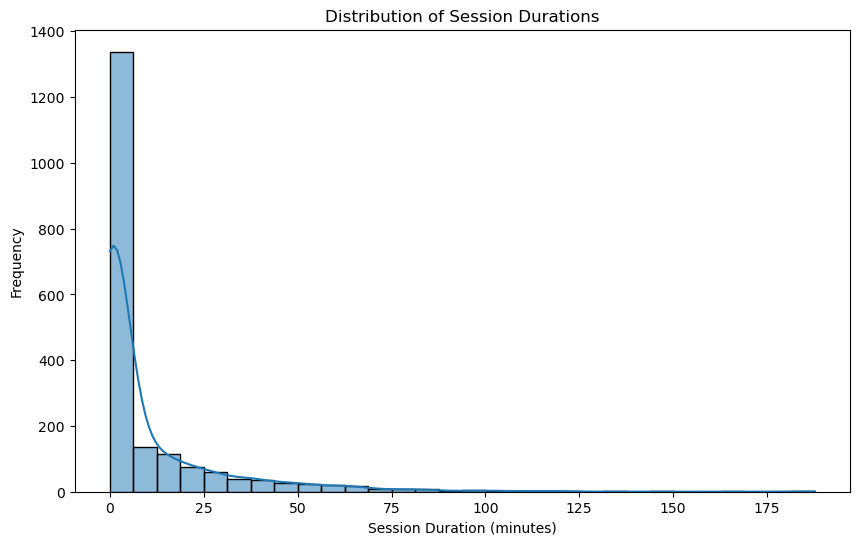

In [41]:
# Визуализация распределения продолжительности сессий
plt.figure(figsize=(10, 6))
sns.histplot(session_data['session_duration'], bins=30, kde=True)
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Durations')
plt.show()

## Расчет метрик Retention Rate, Churn Rate, ARPU и Lifetime Value (LTV)
1. Retention Rate. Процент пользователей, которые продолжают использовать продукт через 1, 2 и 3 месяца после регистрации.
2. Churn Rate. Отток клиентов: сколько человек отказались пользоваться продуктом. (100% - Retention Rate).
3. ARPU. Average revenue per user — средний доход с пользователя. С помощью этой метрики можно оценить всю выручку, которую бизнес заработал с одного пользователя за определённый период. ARPU = Общая выручка / количество активных пользователей
4. LTV. Lifetime value — пожизненная ценность клиента: сколько денег принёс пользователь за всё время, что он покупает продукцию.

In [85]:
# Преобразование временных меток в формат datetime
users_df['joined_at'] = pd.to_datetime(users_df['joined_at'])
payments_df['created_at'] = pd.to_datetime(payments_df['created_at'])

# Определение когорты (месяц регистрации)
users_df['cohort'] = users_df['joined_at'].dt.to_period('M')

# Объединение данных пользователей и сообщений
user_messages_df = messages_df.merge(users_df[['id', 'cohort']], left_on='user_id', right_on='id')

# Определение активности пользователей по месяцам
user_messages_df['activity_month'] = user_messages_df['created_at'].dt.to_period('M')

# Построение когорты
cohort_counts = user_messages_df.groupby(['cohort', 'activity_month']).agg({'user_id': 'nunique'}).reset_index()
cohort_pivot = cohort_counts.pivot(index='cohort', columns='activity_month', values='user_id')

# Нормализация данных для получения коэффициентов удержания
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0).fillna(0)

# Рассчитываем Retention Rate за два месяца
retention_rate_month_1 = retention_matrix.iloc[:, 1].mean() * 100 if retention_matrix.shape[1] > 1 else 0
retention_rate_month_2 = retention_matrix.iloc[:, 2].mean() * 100 if retention_matrix.shape[1] > 2 else 0

# Churn Rate = 100% - Retention Rate
churn_rate_month_1 = 100 - retention_rate_month_1
churn_rate_month_2 = 100 - retention_rate_month_2

# ARPU (Average Revenue per User)

payments_df['total_amount'] = pd.to_numeric(payments_df['total_amount'], errors='coerce')
total_revenue = payments_df['total_amount'].sum()
active_users = messages_df['user_id'].nunique()
arpu = total_revenue / active_users 


# Вывод результатов
results = {
    "Retention Rate Month 1 (%)": retention_rate_month_1,
    "Retention Rate Month 2 (%)": retention_rate_month_2,
    "Churn Rate Month 1 (%)": churn_rate_month_1,
    "Churn Rate Month 2 (%)": churn_rate_month_2,
    "Average Churn Rate (%)": average_churn_rate,
    "Average Revenue per User (ARPU)": arpu,
}

results

{'Retention Rate Month 1 (%)': 10.896596858638743,
 'Retention Rate Month 2 (%)': 8.551483420593367,
 'Churn Rate Month 1 (%)': 89.10340314136126,
 'Churn Rate Month 2 (%)': 91.44851657940663,
 'Average Churn Rate (%)': 93.5173065735893,
 'Average Revenue per User (ARPU)': 6.793931731984829}

In [87]:
# Расчет LTV 
# Средний Churn Rate за 2 месяца
average_churn_rate = (churn_rate_month_1 + churn_rate_month_2 ) / 2
lifetime = 1 / (average_churn_rate / 100) if average_churn_rate > 0 else 0

# LTV по формуле: LTV = ARPU x Lifetime
ltv_arpu_lifetime = arpu * lifetime

# LTV по формуле: LTV = Доход за определённое время / Все клиенты за это время
ltv_total_revenue = total_revenue / total_users if total_users > 0 else 0


# Вывод результатов
results = {
    "LTV (ARPU x Lifetime)": ltv_arpu_lifetime,
    "LTV (Total Revenue / Total Users)": ltv_total_revenue,
}

results

{'LTV (ARPU x Lifetime)': 7.525737463763294,
 'LTV (Total Revenue / Total Users)': 6.793931731984829}

## Выводы:
1. Cредний доход с пользователя составляет 6.7 рублей.
2. Процент пользователей, которые продолжают использовать продукт за 1 и 2 месяцы составляет 10.9% и 8.6% соответственно.
3. Отток клиентов за 1 и 2 месяцы составляет 89.1% и 91.4% соответственно.
4. Прибыль от клиента за период, пока вы с ним работаете (LTV) равна ~7.52 рублям.

# Рекомендации

1. ## Увеличение Retention Rate:
   
        Улучшение качества продукта и пользовательского опыта, чтобы пользователи оставались довольными и продолжали пользоваться продуктом.
        Внедрение программ лояльности и бонусов для пользователей, которые активно используют продукт.

2. ## Снижение Churn Rate:
   
        Анализ причин, по которым пользователи прекращают использовать продукт, и устранение этих причин.
        Предоставление качественной поддержки и реагирование на отзывы пользователей.

3. ## Увеличение LTV:
   
        Разработка дополнительных платных функций и контента, чтобы пользователи тратили больше денег на продукт.
        Оптимизация ценовой политики и внедрение программ подписки для увеличения дохода от каждого пользователя.
4. ### Внедрение новых функций и обновлений, чтобы поддерживать долгосрочный интерес пользователей к продукту.
5. ### Проведение ежемесячных обзоров или рассылок, чтобы напоминать пользователям о продукте и его преимуществах.
